Allows multiple variables to display without using a print statement
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

# Business Understanding (10 points)
#Describe the purpose of the data set you selected (i.e., why was this data collected in the ﬁrst place?). 
#Describe how you would deﬁne and measure the outcomes from the dataset. 
#That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? 
#How would you measure the effectiveness of a good prediction algorithm? Be speciﬁc. 

This project looks at the affordable care act Dental premiums for 2017.  The dataset is available from:
https://data.healthcare.gov/dataset/2017-QHP-Landscape-Individual-Market-Dental-Excel/f6am-7dvb

The Landscape Individual Market Dental rates represent the Dental premiums for individuals and families.  Dental was chosen for this excercise purely because it is an infrequently discussed topic in the news media.  The dataset contains approximately 50,000 records  The premiums and deductables for various age categories and family size are listed by county for 39 states participating in the federal exchange.  In addition, US census data was downloaded with considerable effort to decode, clean it up, and prepare it for future projects with this dataset. 

Short term outcomes include a better understanding of working with large datasets in Python and exploring the data to prepare for future projects.
Long term objective is to understand if there is a relationship between Dental premiums, and census data for the county such as average income, crime, etc.


## Data Understanding (80 points)

### 10 points - Describe data, outcome metrics,
#1)Describe the purpose of the data set, why was the data collected.  Define outcome measures, what is important, 
#how do you know if you achieved the objective.  How to measure the effectiveness of a good prediction algorythm.

In [ ]:
#### 15 points - Data Quality, Explain data cleansing steps, give justifications
Data quality proved challenging for inexperienced Python programmers. Although the file was named excel, it was a .csv file.  
Fieldnames were present but contained spaces, +, and commas, which had to be corrected.  The Python Pandas package was disappointing. 
Python does not have a dollar data type, the numeric premium and deductable fields were formatted with dollar sign prefixes and commas in the data, 
in addition there were text entries such as 'Not Applicable' in the dataset that had to be converted to NaN's
The file was imported using the default type chosen by pandas, for most fields this was an object. Then a replace routine examined each numeric field to remove the offending string characters and convert the field to float.
Way too much time was spent trying to format the numeric fields representing dollars to type decimal, but this didn't seem to work, so the team went with float.  

Python compresses the number of rows and columns to fit the screen and we were not able to find the syntax to simply view example records from each column from within python.  
We had to resort to using Excel.  As our experience grows, we might possibly stumble on a better method.


In [61]:
#This lets the notebook use a wider part of your screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"));

In [62]:
#Downloads and unpack US Census County Data from census.gov
import downloadUSACounties;

In [63]:
#Creates Mongo database 'Census' and collection 'Mastdata' used to make Census data human-readable
import loadMastdata

In [94]:
#Get path to Data directory with downloaded .csv files
import os
jupyterDir = os.path.realpath('../')
print('Proj dir = ', jupyterDir)
csvDir = os.path.join(jupyterDir,'Data')
print('Data dir = ',csvDir)
os.listdir(csvDir);

Proj dir =  C:\Users\Randy\Documents\GitHub\2017_MSDS_7331_DataMining
Data dir =  C:\Users\Randy\Documents\GitHub\2017_MSDS_7331_DataMining\Data


In [95]:
#Import the 2017 Healthcare Individual Market Dental data
#sourced from    https://data.healthcare.gov/dataset/2017-QHP-Landscape-Individual-Market-Dental-Excel/f6am-7dvb

import pandas as pd
infile = '2017_QHP_Landscape_Individual_Market_Dental.csv'
infilepath = csvDir + '\\'+ infile
print('Input file path=',infilepath)

#print(pd.get_option('max_columns'))
#attempt so show all columns rather than the first few and last few, didn't work
pd.set_option('max_columns',100)
pd.set_option('expand_frame_repr', True)
pd.set_option('large_repr','info')

#define a mapping dictionary for fields as needed
#FIPS County Code - Was stripping leading zeros and coming in as a number, it is a zip code
dtype_dict = {'FIPS County Code': str,'State Code': str}

df = pd.read_csv(infilepath,header ='infer',sep=',',dtype=dtype_dict,low_memory=False) # ,nrows=50 to limit the number of rows
df.columns = [c.replace(' ','_') for c in df.columns]
df.columns = [c.replace(',','') for c in df.columns]
df.columns = [c.replace('_-_','') for c in df.columns]
df.columns = [c.replace('+','_') for c in df.columns]

df.columns
#print('state code type',type(df.State_Code))
#print(list(df))
#df.columns.tolist()
#print(df)
#print(df.dtypes)
#print(df.head(5))
#df.describe()
;

#Note the output below shows the first few and last few columns and first few and last few rows
#How to show all columns?

Input file path= C:\Users\Randy\Documents\GitHub\2017_MSDS_7331_DataMining\Data\2017_QHP_Landscape_Individual_Market_Dental.csv


''

In [116]:
# decimal not used currently. intended to be used on numeric dollar fields but couldn't figure out the syntax
import decimal
D = decimal.Decimal

#cast each field as the desired data type.  Clean the numeric fields then cast them as float
df["State_Code"]=df["State_Code"].astype(str)
df["FIPS_County_Code"]=df["FIPS_County_Code"].astype(str)
df["County_Name"]=df["County_Name"].astype(str)
df["Metal_Level"]=df["Metal_Level"].astype(str)
df["Issuer_Name"]=df["Issuer_Name"].astype(str)
df["HIOS_Issuer_ID"]=df["HIOS_Issuer_ID"].astype(str)
df["Plan_ID_(Standard_Component)"]=df["Plan_ID_(Standard_Component)"].astype(str)
df["Plan_Marketing_Name"]=df["Plan_Marketing_Name"].astype(str)
df["Plan_Type"]=df["Plan_Type"].astype(str)
df["Rating_Area"]=df["Rating_Area"].astype(str)
df["Child_Only_Offering"]=df["Child_Only_Offering"].astype(str)
df["Source"]=df["Source"].astype(str)
df["Customer_Service_Phone_Number_Local"]=df["Customer_Service_Phone_Number_Local"].astype(str)
df["Customer_Service_Phone_Number_Toll_Free"]=df["Customer_Service_Phone_Number_Toll_Free"].astype(str)
df["Customer_Service_Phone_Number_TTY"]=df["Customer_Service_Phone_Number_TTY"].astype(str)
df["Network_URL"]=df["Network_URL"].astype(str)
df["Plan_Brochure_URL"]=df["Plan_Brochure_URL"].astype(str)
df["Summary_of_Benefits_URL"]=df["Summary_of_Benefits_URL"].astype(str)
df["Drug_Formulary_URL"]=df["Drug_Formulary_URL"].astype(str)
df["Routine_Dental_ServicesAdult_(Coverage)"]=df["Routine_Dental_ServicesAdult_(Coverage)"].astype(str)
df["Basic_Dental_CareAdult_(Coverage)"]=df["Basic_Dental_CareAdult_(Coverage)"].astype(str)
df["Major_Dental_CareAdult_(Coverage)"]=df["Major_Dental_CareAdult_(Coverage)"].astype(str)
df["OrthodontiaAdult_(Coverage)"]=df["OrthodontiaAdult_(Coverage)"].astype(str)
df["Dental_Check-Up_for_Children_(Coverage)"]=df["Dental_Check-Up_for_Children_(Coverage)"].astype(str)
df["Basic_Dental_CareChild_(Coverage)"]=df["Basic_Dental_CareChild_(Coverage)"].astype(str)
df["Major_Dental_CareChild_(Coverage)"]=df["Major_Dental_CareChild_(Coverage)"].astype(str)
df["OrthodontiaChild_(Coverage)"]=df["OrthodontiaChild_(Coverage)"].astype(str)
df["Premium_Rates"]=df["Premium_Rates"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Child"]=df["Premium_Child"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_21"]=df["Premium_Adult_Individual_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_27"]=df["Premium_Adult_Individual_Age_27"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_30_"]=df["Premium_Adult_Individual_Age_30_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_40_"]=df["Premium_Adult_Individual_Age_40_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_50_"]=df["Premium_Adult_Individual_Age_50_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Adult_Individual_Age_60_"]=df["Premium_Adult_Individual_Age_60_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_21__"]=df["Premium_Couple_21__"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_30_"]=df["Premium_Couple_30_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_40_"]=df["Premium_Couple_40_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_50_"]=df["Premium_Couple_50_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Premium_Couple_60_"]=df["Premium_Couple_60_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_1_child_Age_21"]=df["Couple_1_child_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_1_child_Age_30_"]=df["Couple_1_child_Age_30_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_1_child_Age_40_"]=df["Couple_1_child_Age_40_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_1_child_Age_50_"]=df["Couple_1_child_Age_50_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_2_children_Age_21"]=df["Couple_2_children_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_2_children_Age_30_"]=df["Couple_2_children_Age_30_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_2_children_Age_40_"]=df["Couple_2_children_Age_40_"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_2_children_Age_50"]=df["Couple_2_children_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_3_or_more_Children_Age_21"]=df["Couple_3_or_more_Children_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_3_or_more_Children_Age_30"]=df["Couple_3_or_more_Children_Age_30"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_3_or_more_Children_Age_40"]=df["Couple_3_or_more_Children_Age_40"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Couple_3_or_more_Children_Age_50"]=df["Couple_3_or_more_Children_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_1_child_Age_21"]=df["Individual_1_child_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_1_child_Age_30"]=df["Individual_1_child_Age_30"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_1_child_Age_40"]=df["Individual_1_child_Age_40"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_1_child_Age_50"]=df["Individual_1_child_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_2_children_Age_21"]=df["Individual_2_children_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_2_children_Age_30"]=df["Individual_2_children_Age_30"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_2_children_Age_40"]=df["Individual_2_children_Age_40"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_2_children_Age_50"]=df["Individual_2_children_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_3_or_more_children_Age_21"]=df["Individual_3_or_more_children_Age_21"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_3_or_more_children_Age_30"]=df["Individual_3_or_more_children_Age_30"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_3_or_more_children_Age_40"]=df["Individual_3_or_more_children_Age_40"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Individual_3_or_more_children_Age_50"]=df["Individual_3_or_more_children_Age_50"].replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Standard_On_Exchange"]=df["Standard_On_Exchange"].astype(str)
df["Dental_DeductibleIndividualStandard"]=df["Dental_DeductibleIndividualStandard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_DeductibleFamilyStandard"]=df["Dental_DeductibleFamilyStandard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_DeductibleFamily_(Per_Person)Standard"]=df["Dental_DeductibleFamily_(Per_Person)Standard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_Maximum_Out_of_PocketIndividualStandard"]=df["Dental_Maximum_Out_of_PocketIndividualStandard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_Maximum_Out_of_PocketFamilyStandard"]=df["Dental_Maximum_Out_of_PocketFamilyStandard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Dental_Maximum_Out_of_PocketFamily_(Per_Person)Standard"]=df["Dental_Maximum_Out_of_PocketFamily_(Per_Person)Standard"].replace('Not Applicable','NaN').replace('See Plan Brochure','NaN').replace( '[\$,)]','', regex=True ).replace( '[(]','-', regex=True).astype(float)
df["Routine_Dental_ServicesAdult"]=df["Routine_Dental_ServicesAdult"].astype(str)
df["Basic_Dental_CareAdult"]=df["Basic_Dental_CareAdult"].astype(str)
df["Major_Dental_CareAdult"]=df["Major_Dental_CareAdult"].astype(str)
df["OrthodontiaAdult"]=df["OrthodontiaAdult"].astype(str)
df["Dental_Check-Up_for_Children"]=df["Dental_Check-Up_for_Children"].astype(str)
df["Basic_Dental_CareChild"]=df["Basic_Dental_CareChild"].astype(str)
df["Major_Dental_CareChild"]=df["Major_Dental_CareChild"].astype(str)
df["OrthodontiaChild"]=df["OrthodontiaChild"].astype(str)
;



''

In [119]:
#check data types
df.dtypes
#df.Issuer_Name.unique()

State_Code                                                  object
FIPS_County_Code                                            object
County_Name                                                 object
Metal_Level                                                 object
Issuer_Name                                                 object
HIOS_Issuer_ID                                              object
Plan_ID_(Standard_Component)                                object
Plan_Marketing_Name                                         object
Plan_Type                                                   object
Rating_Area                                                 object
Child_Only_Offering                                         object
Source                                                      object
Customer_Service_Phone_Number_Local                         object
Customer_Service_Phone_Number_Toll_Free                     object
Customer_Service_Phone_Number_TTY                           ob

In [37]:
#example from http://seaborn.pydata.org/tutorial/distributions.html
%matplotlib inline
import sys
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
sns.set(style='whitegrid', color_codes=True)
sns.axes_style()
sns.set()

#### 15 points - Visualize 5 or more interesting attributes, interpret implications for each visualization, explain for each attribute, why the visualization is appropriate.

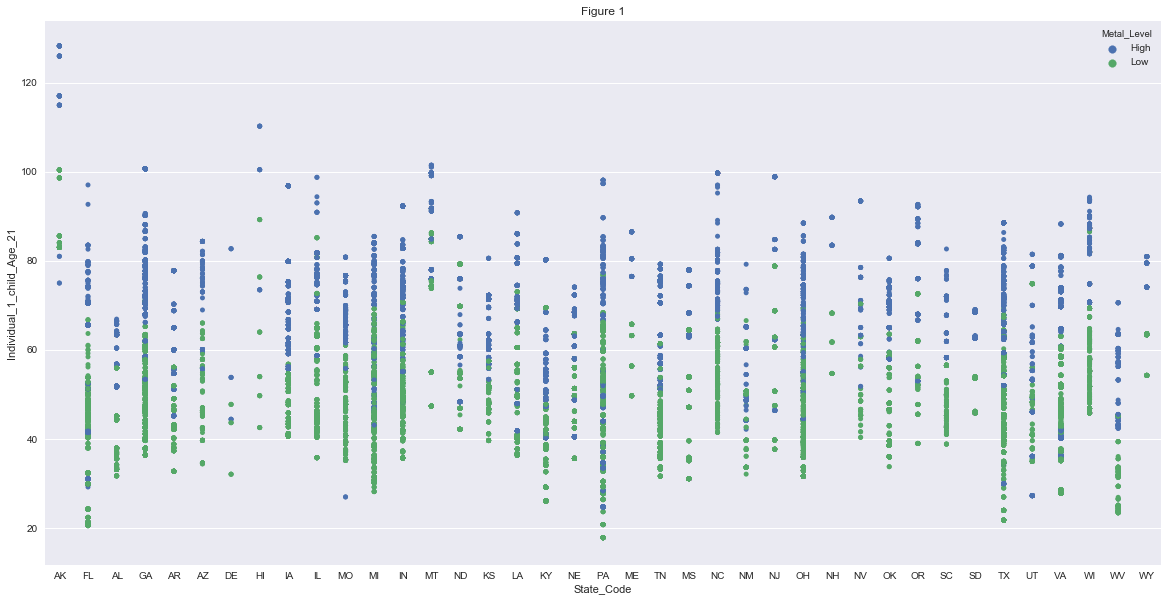

In [91]:
f, ax = plt.subplots(figsize=(20,10))
ax.set_title('Figure 1')
sns.stripplot(ax=ax,data = df, x='State_Code', y='Individual_1_child_Age_21',hue='Metal_Level',hue_order=['High','Low']);

Figure 1 shows the distribution of Dental premiums by state and "Metal Level".  Metal level is not an intuitive description.  Essentially, plans with higher premiums and lower deductables such as Platinum and Gold are considered to have a High metal level and plans with low premiums and high deductables such as the bronze and silver plans, are considered to be a low "Metal Level"


In [128]:
df.Dental_DeductibleIndividualStandard.head()
print("Percent of records with $0 individual deductable =",float(len((df[df.Dental_DeductibleIndividualStandard==0]))/len(df))*100.0)

Percent of records with $0 individual deductable = 2.50996252899542


In [107]:
import re

def plan_level(plantext):
    if 'bronze' in plantext 
        level = 'Bronze'
    else 
        level = 'Other'
    return level


df2.level = df.Plan_Marketing_Name.index("Bronze")

SyntaxError: invalid syntax (<ipython-input-107-6e3da937d81d>, line 2)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "


ValueError: need at least one array to concatenate

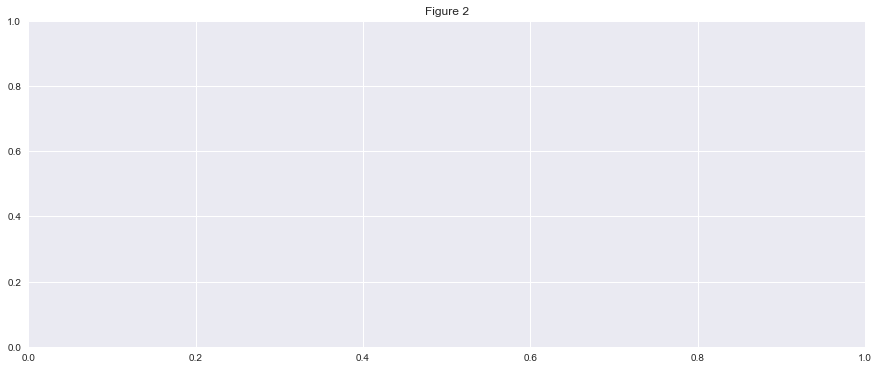

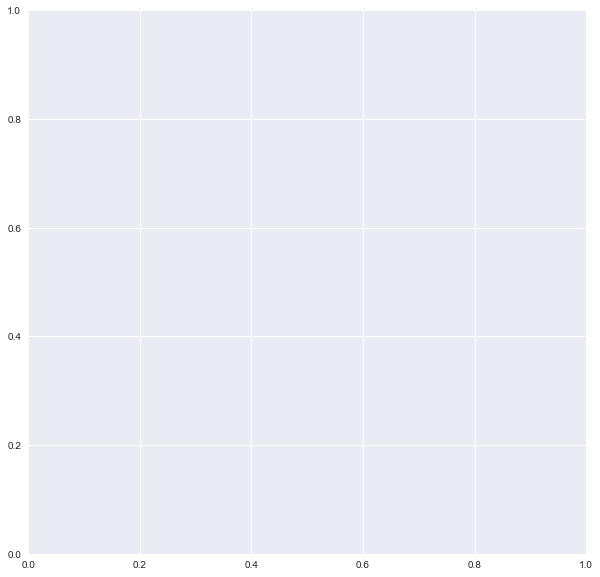

In [106]:
f, ax = plt.subplots(figsize=(15,6))
ax.set_title('Figure 2')

import seaborn as sns
import seaborn.linearmodels as slm

df_imputed = df.fillna(df.median())
#f, ax = plt.subplots(figsize=(15,10))

df_40 = df_imputed[['Premium_Adult_Individual_Age_21','Premium_Couple_21__','Couple_1_child_Age_21','Couple_2_children_Age_21','Couple_3_or_more_Children_Age_21','Individual_1_child_Age_21','Individual_2_children_Age_21', 'Individual_3_or_more_children_Age_21']]
#ax = df_40.boxplot(vert=False)

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 10))

slm.corrplot(df_40, annot=True, sig_stars=True, diag_names=True, cmap=cmap,ax=ax)



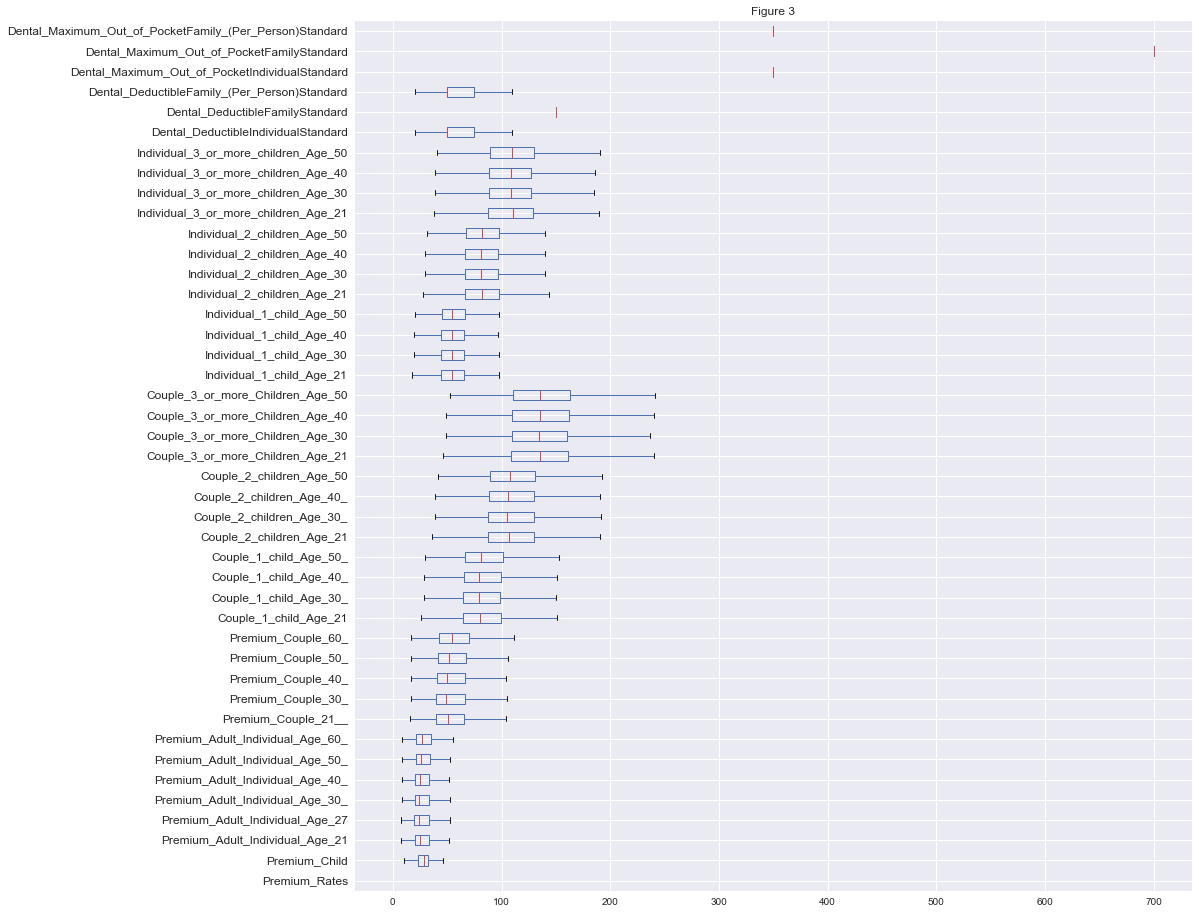

In [87]:
f, ax = plt.subplots(figsize=(15,16))
ax.set_title('Figure 3')
ax = df.boxplot(vert=False)


This is a high level look at our numeric variables, we have the box plot of the premiums of the different plans, showing that the least variation in prices exist in the Premium_Adult_Individual group, along with this one we have the Individual with one child having the least variation in premiums; and the largest variations exit in the families with three or more kids. In fact we can observe that the larger the family, either Individual with three or more kids, Couples with 2 children and couples with three or more children are the groups with the largest variations in premium prices. Thus the larger the family the larger the variations in prices.

#### 10 points - Visualize appropriate statistics on a subset of the data, explain why the statistics are meaningful

#### 15 points - Visualize relationships between attributes, ie scatter plots, correlation, cross=tabulation, groupwise avgs, etc.  Explain interesting relationships

#### 10 points - Identify and explain interesting relationships between features and the class you are trying to predict

#### 5 points - Are there other features that could be added to the data or created from existing features, explain.

One thing we would like to have is the actual signup count by plan by county.  We know the premiums but we do not know how many people are choosing each premium in each county.  We could not find this information on healthcare.gov

## Exceptional Work (10 points)

In [ ]:
#### Free reign on additional analysis 
#### Dimensional reduction, image processing, etc.

In [ ]:
Considerable effort went into building a census dataset to go along with the healthcare data in preparation for future projects.

In [ ]:
#Skip below here

In [ ]:
#save for future projects, there did't seem to be a way to copy entire cells to a new notebook, need further investigation

In [80]:
# Tried to use altair to create charts, ran into memory issues with Chrome crashing, might try again on a future project, it looked promising
# jupyter nbextension install --sys-prefix --py  vega
# jupyter nbextension vega --py --sys-prefix 
# conda install vega --channel conda-forge
# pip install git+https://github.com/altair-viz/altair

#import pathlib
#data_to_chart = csvDir + '\\'+ 'data_to_chart.csv'
#df.to_csv(data_to_chart)
#print(data_to_chart)

In [ ]:
#This worked but after it ran once I was getting memory errors with Chrome crashing.  Seems like it is a known bug but no solution yet.

#from altair import Chart
#data_to_plot = df.sort_values(by='Individual_1_child_Age_21', ascending=True)

#chart = Chart(data_to_plot).mark_circle().encode(
#    x='State_Code',
#    y='Individual_1_child_Age_21',
#    color = 'Metal_Level'
#)
#chart.display()

In [ ]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
#print('Matplotlib version ' + plt.__version__)
print('Seaborn version ' + sns.__version__)
print('numpy version ' + np.__version__)
#print('scipy version ' + stats.__version__)


In [ ]:
# Got stuck on mapping, gave up for now

In [ ]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

In [ ]:
#import statenames
import us
us.states.mapping('abbr','name')
#How can we list all states and show the ones in our dataset

In [ ]:
#List of states in the dataset
statelist = list(set(df.State_Code))
print('Count of states =', len(statelist))
print(statelist)

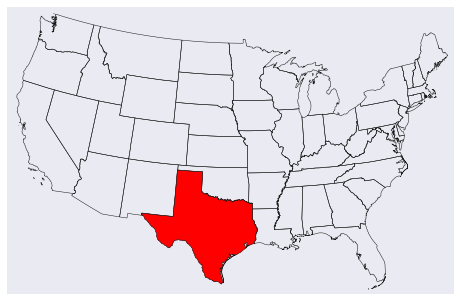

In [97]:
#conda install -c conda-forge basemap=1.0.8.dev0
#conda install -c conda-forge basemap-data-hires      Need this for high resolution maps like county maps

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)
# collect the state names from the shapefile attributes so we can

# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon   -  I can get it to work for one state, how do I convert state abbreviations to statenames and pass in a list of states?
seg = map.states[state_names.index('Texas')]
#seg = map.states[statelist]

poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)

plt.show()

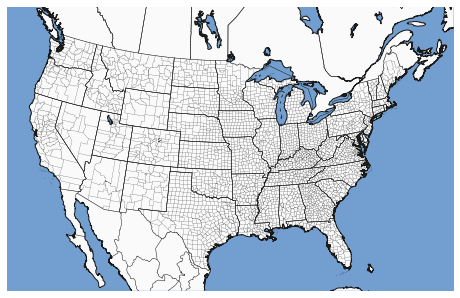

In [98]:
#westlimit=-125.3; southlimit=24.6; eastlimit=-65.6; northlimit=49.7

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_map_background(m, ax):
# ax.set_axis_bgcolor('#729FCF')
    ax.set_facecolor('#729FCF')
    m.fillcontinents(color='#FAFAFA', ax=ax, zorder=0)
    m.drawcounties(ax=ax)
    m.drawstates(ax=ax)
    m.drawcountries(ax=ax)
    m.drawcoastlines(ax=ax)
KM = 1000.
# 750 zooms in but doesn't make the map larger not sure how to do that
#KM = 750.  
clat = 39.3
clon = -94.7333
wid = 5500 * KM
hgt = 3500 * KM
m = Basemap(width=wid, height=hgt, rsphere=(6378137.00,6356752.3142),
            resolution='i', area_thresh=2500., projection='lcc',
            lat_1=38.5, lat_2=38.5, lat_0=clat, lon_0=clon)
fig = plt.figure()
ax = fig.add_subplot(111)
draw_map_background(m, ax)
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#import matplotlib.cm
#from matplotlib.patches import Polygon
#from matplotlib.collections import PatchCollection
#from matplotlib.colors import Normalize

plt.figure(figsize=(24,12))
#= plt.subplots(figsize=(20,10))
def draw_map_background(m, ax):
    m = Basemap(resolution='i',projection='lcc',
        llcrnrlon=-119,llcrnrlat=22,
        urcrnrlon=-64,urcrnrlat=49,
        lat_1=32,lat_2=45,lon_0=-95)
#    m.drawmapboundary(fill_color='#46bcec')
#    m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
    m.readshapefile('st99_d00', name='states', drawbounds=True)
#    m.drawcoastlines()
    m.drawcounties()
#    m.drawstates()
    ax = fig.add_subplot(111)


draw_map_background(m, ax)
plt.title('US map showing states with federal ACA exchanges')

plt.show()

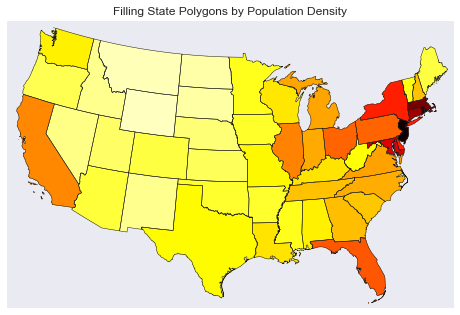

In [99]:
#example here https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  438.00,
'Rhode Island':   387.35,
'Massachusetts':   312.68,
'Connecticut':    271.40,
'Maryland':   209.23,
'New York':    155.18,
'Delaware':    154.87,
'Florida':     114.43,
'Ohio':  107.05,
'Pennsylvania':  105.80,
'Illinois':    86.27,
'California':  83.85,
'Hawaii':  72.83,
'Virginia':    69.03,
'Michigan':    67.55,
'Indiana':    65.46,
'North Carolina':  63.80,
'Georgia':     54.59,
'Tennessee':   53.29,
'New Hampshire':   53.20,
'South Carolina':  51.45,
'Louisiana':   39.61,
'Kentucky':   39.28,
'Wisconsin':  38.13,
'Washington':  34.20,
'Alabama':     33.84,
'Missouri':    31.36,
'Texas':   30.75,
'West Virginia':   29.00,
'Vermont':     25.41,
'Minnesota':  23.86,
'Mississippi':   23.42,
'Iowa':  20.22,
'Arkansas':    19.82,
'Oklahoma':    19.40,
'Arizona':     17.43,
'Colorado':    16.01,
'Maine':  15.95,
'Oregon':  13.76,
'Kansas':  12.69,
'Utah':  10.50,
'Nebraska':    8.60,
'Nevada':  7.03,
'Idaho':   6.04,
'New Mexico':  5.79,
'South Dakota':  3.84,
'North Dakota':  3.59,
'Montana':     2.39,
'Wyoming':      1.96,
'Alaska':     0.42}
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density')
plt.show()